In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
cancer = load_breast_cancer()
data = cancer.data
labels = cancer.target

df = pd.DataFrame(data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


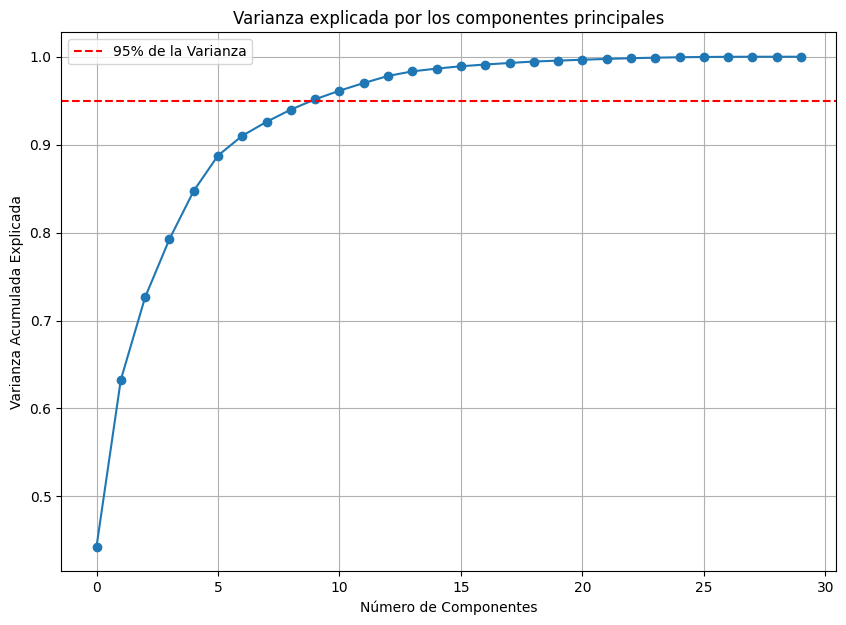

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza explicada por los componentes principales')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de la Varianza')
plt.legend(loc="best")
plt.show()

In [13]:
# Nos quedamos con 10 componentes

NUM_COMPONENTS = 10
pca = PCA(n_components=NUM_COMPONENTS)
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data) # Sacamos el dataset con los transformed scores (10 dimensiones)

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

In [15]:
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_pca['Diagnosis'] = cancer.target
df_pca.tail(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Diagnosis
559,-1.089376,1.292848,1.429379,3.372136,-0.947342,-1.725870,-0.353975,-1.164340,-0.207495,-1.391708,1
560,-0.481771,-0.178020,1.032108,2.010280,-0.327103,-0.992062,-0.048546,-0.195221,-0.325865,0.429072,1
561,-4.870310,-2.131106,3.414189,5.133988,0.488921,-1.110792,0.488371,-1.289284,-1.390479,-1.746663,1
562,5.917613,3.482637,-3.262792,3.917585,-1.716382,1.013599,0.271442,0.091963,0.372476,-0.630423,0
563,8.741338,-0.573855,0.897090,-0.385150,-0.679043,-0.300753,0.094824,-0.734082,0.831093,0.450639,0
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,0
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,0
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,0
568,-5.475243,-0.670637,1.490443,2.299157,0.184703,1.617837,1.698952,1.046354,0.374101,-0.047726,1


Text(0.5, 1.0, 'Componentes Principales 1 y 2')

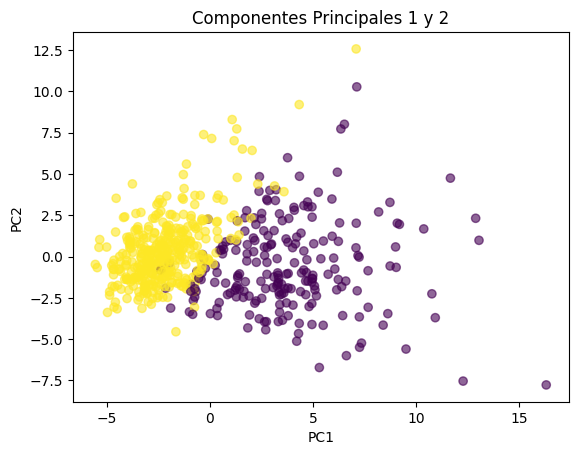

In [17]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Diagnosis'], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Componentes Principales 1 y 2")
# Morado (Maligno), Amarillo (Benigno)

In [33]:
print("Pesos de cada columna original en el PC1")
for c in range(df.shape[1]):
  print(f"{cancer.feature_names[c]}: {pca.components_[0,c]:.3f}")

Pesos de cada columna original en el PC1
mean radius: 0.219
mean texture: 0.104
mean perimeter: 0.228
mean area: 0.221
mean smoothness: 0.143
mean compactness: 0.239
mean concavity: 0.258
mean concave points: 0.261
mean symmetry: 0.138
mean fractal dimension: 0.064
radius error: 0.206
texture error: 0.017
perimeter error: 0.211
area error: 0.203
smoothness error: 0.015
compactness error: 0.170
concavity error: 0.154
concave points error: 0.183
symmetry error: 0.042
fractal dimension error: 0.103
worst radius: 0.228
worst texture: 0.104
worst perimeter: 0.237
worst area: 0.225
worst smoothness: 0.128
worst compactness: 0.210
worst concavity: 0.229
worst concave points: 0.251
worst symmetry: 0.123
worst fractal dimension: 0.132


## K-MEANS

In [46]:
from sklearn.cluster import KMeans
kmeans_orig = KMeans(n_clusters=2, n_init=15)
kmeans_orig.fit(scaled_data) # Aplicamos kmeans sobre el dataset original

KMeans(n_clusters=2, n_init=15)

In [47]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=2, n_init=15)
kmeans_pca.fit(pca_data) # Aplicamos kmeans sobre las 10 primeras componentes de PCA

KMeans(n_clusters=2, n_init=15)

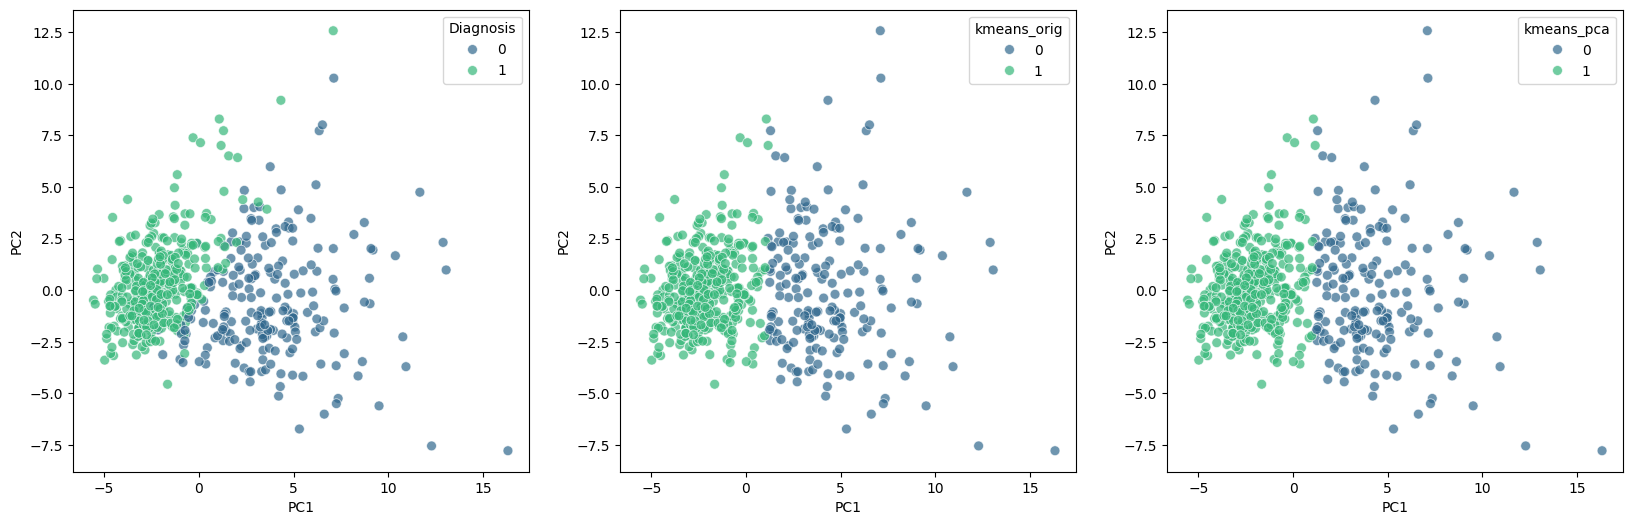

In [48]:
df_pca['kmeans_orig'] = kmeans_orig.labels_
df_pca['kmeans_pca'] = kmeans_pca.labels_

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', ax=axes[0], palette='viridis', s=50, alpha=0.7)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans_orig', ax=axes[1], palette='viridis', s=50, alpha=0.7)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='kmeans_pca', ax=axes[2], palette='viridis', s=50, alpha=0.7)

plt.show()

In [49]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, kmeans_orig.labels_)
print(f"\nAdjusted Rand Index (ARI) Kmeans sobre datos originales: {ari:.4f}")


Adjusted Rand Index (ARI) Kmeans sobre datos originales: 0.6707


In [50]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, kmeans_pca.labels_)
print(f"\nAdjusted Rand Index (ARI) Kmeans sobre PCA (10 componentes): {ari:.4f}")


Adjusted Rand Index (ARI) Kmeans sobre PCA (10 componentes): 0.6707


## AGLOMERATIVE

In [56]:
from sklearn.cluster import AgglomerativeClustering

agglo_orig = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglo_orig.fit(scaled_data)

AgglomerativeClustering()

In [57]:
from sklearn.cluster import AgglomerativeClustering

agglo_pca = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglo_pca.fit(pca_data)

AgglomerativeClustering()

<Axes: xlabel='PC1', ylabel='PC2'>

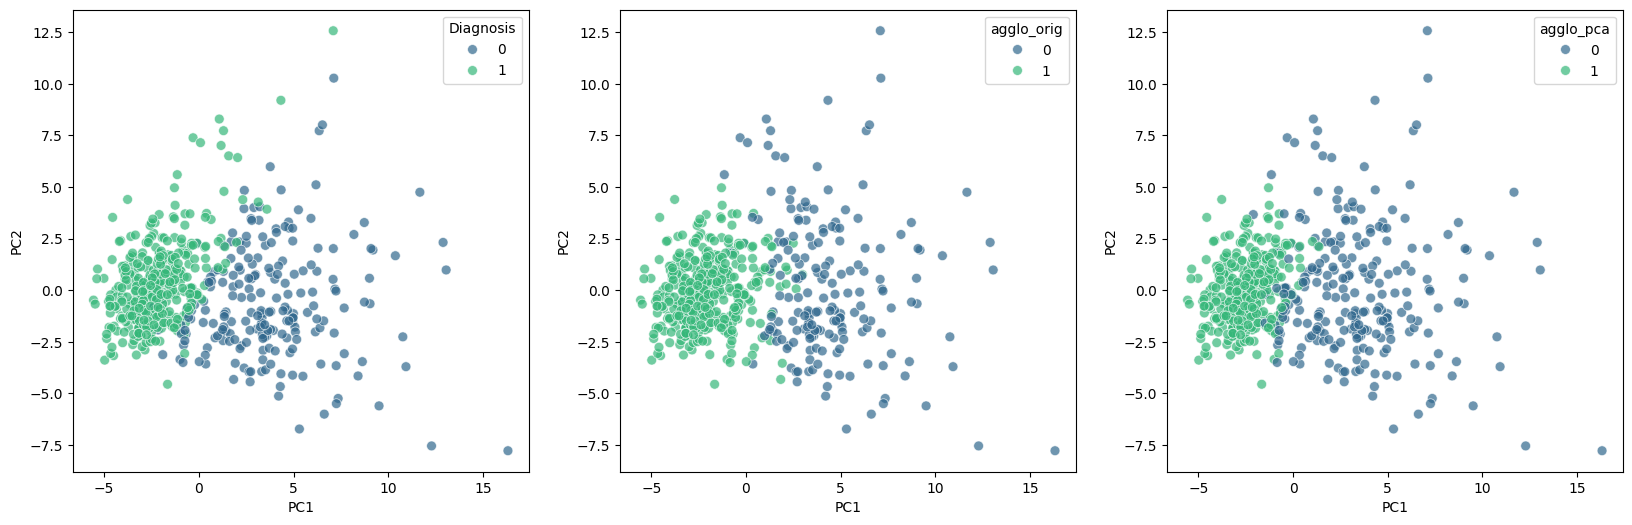

In [58]:
df_pca['agglo_orig'] = agglo_orig.labels_
df_pca['agglo_pca'] = agglo_pca.labels_

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', ax=axes[0], palette='viridis', s=50, alpha=0.7)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='agglo_orig', ax=axes[1], palette='viridis', s=50, alpha=0.7)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='agglo_pca', ax=axes[2], palette='viridis', s=50, alpha=0.7)

In [59]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels, agglo_orig.labels_)
print(f"\nAdjusted Rand Index (ARI) Agglo sobre datos originales: {ari:.4f}")


Adjusted Rand Index (ARI) Agglo sobre datos originales: 0.5750


In [60]:
from sklearn.metrics import accuracy_score
ari = adjusted_rand_score(labels, agglo_pca.labels_)
print(f"\nAdjusted Rand Index (ARI) Agglo sobre PCA (10 componentes): {ari:.4f}")

accuracy = accuracy_score(labels, agglo_pca.labels_)
print(f"Precisión (mapeando etiquetas): {accuracy:.4f} ({accuracy*100:.2f}%)")


Adjusted Rand Index (ARI) Agglo sobre PCA (10 componentes): 0.7019
Precisión (mapeando etiquetas): 0.9192 (91.92%)


## DBSCAN

In [138]:
from sklearn.cluster import DBSCAN
dbscan_orig = DBSCAN(eps=2.5, min_samples=4)
dbscan_orig_labels = dbscan_orig.fit_predict(scaled_data)


In [139]:
from sklearn.cluster import DBSCAN
dbscan_pca = DBSCAN(eps=2.5, min_samples=4)
dbscan_pca_labels = dbscan_pca.fit_predict(pca_data)


<Axes: xlabel='PC1', ylabel='PC2'>

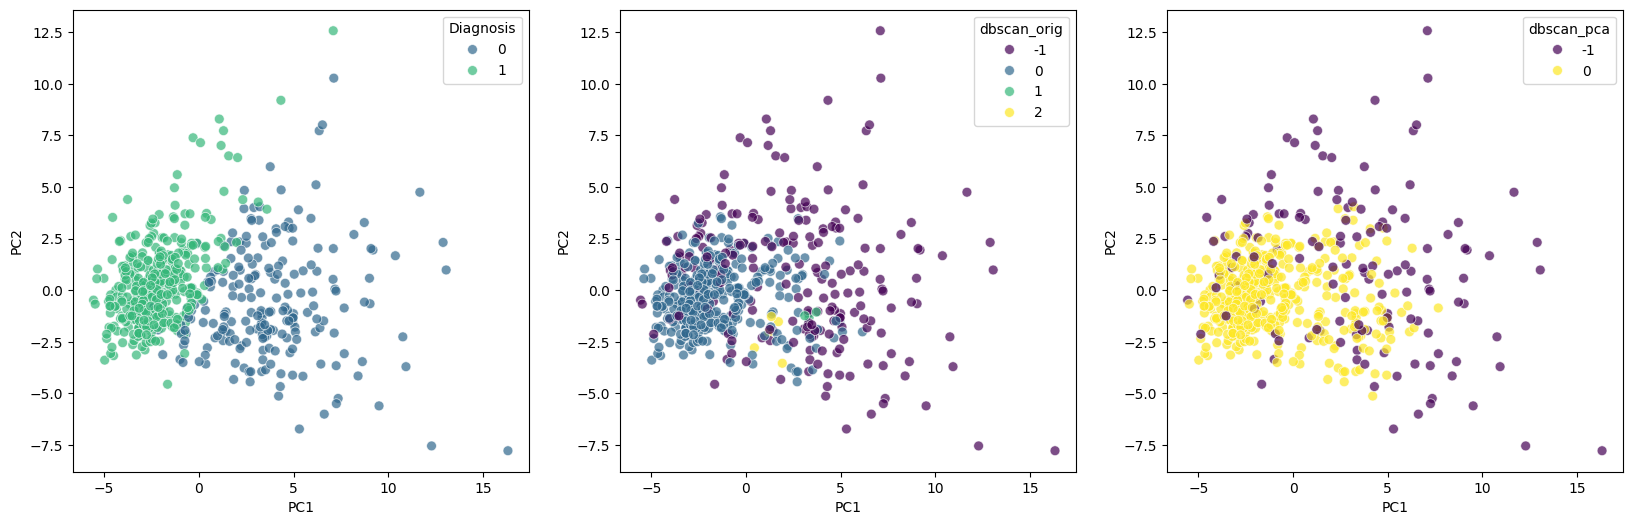

In [140]:
df_pca['dbscan_orig'] = dbscan_orig_labels
df_pca['dbscan_pca'] = dbscan_pca_labels

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', ax=axes[0], palette='viridis', s=50, alpha=0.7)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dbscan_orig', ax=axes[1], palette='viridis', s=50, alpha=0.7)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dbscan_pca', ax=axes[2], palette='viridis', s=50, alpha=0.7)